In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import h5py
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.measure import label

In [11]:
target_keys = '015'
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'r') as hf:
    print(list(hf))
    img = hf[f'images/{target_keys}'][:].astype(np.float32)
    mask = hf[f'labels/{target_keys}'][:].astype(np.uint8)
    img_ref = hf['images/004'][:].astype(np.float32)
    mask_ref  = hf['labels/004'][:].astype(np.uint8)


['images', 'labels']


In [12]:
vol = np.sum(mask_ref==0)
for c in range(4):
    print(f'class {c}: {np.sum(mask_ref==c)/vol*100: .3f}% background')

class 0:  100.000% background
class 1:  0.393% background
class 2:  0.149% background
class 3:  0.092% background


**Issue**: Subject 015/049 masks seem to be corrupted (all labeled voxel are set to 1).

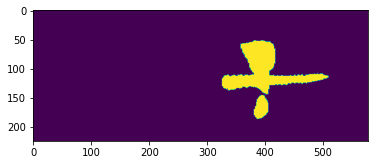

In [74]:
plt.imshow(img[0].max(axis=1))
plt.imshow(mask[0].max(axis=1))

detected components : 3


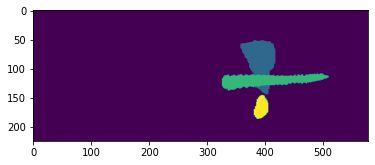

In [75]:
# reconstructing connected components
mask_labeled, num_comp = label(mask[0,...], return_num=True)
print('detected components :', num_comp)
# map labels to 10,11,12,13
plt.imshow(mask_labeled.max(axis=1))

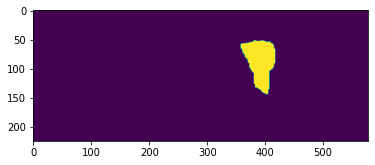

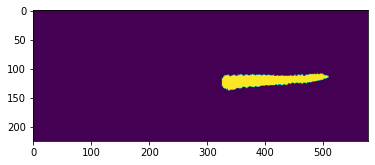

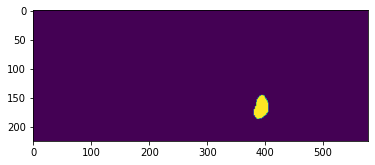

In [76]:
# check classes: liver(1), spine(2), spleen(3)
plt.imshow((mask_labeled==1).max(axis=1))
plt.show()
plt.imshow((mask_labeled==2).max(axis=1))
plt.show()
plt.imshow((mask_labeled==3).max(axis=1))
plt.show()

In [77]:
# replace original image
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'a') as hf:
    hf[f'labels/{target_keys}'][:] = mask_labeled[np.newaxis, ...]   

### Original affine matrix seems to be corrupted !!!!
They had to be corrected manually.

In [8]:
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'r') as hf:
    target_keys = list(hf['images'])
    img = hf[f'images/{target_keys[0]}'][:].astype(np.float32)
    mask = hf[f'labels/{target_keys[0]}'][:].astype(np.uint8)

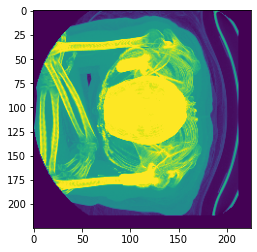

In [11]:
plt.imshow(img[0].max(axis=2))

In [48]:
# Fixing the corrupted orientation (A-P instead of P-A)
#h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
#with h5py.File(h5_path, 'a') as hf:
#    target_keys = list(hf['images'])
#    for key in target_keys:
#        img = hf[f'images/{key}'][:]
#        hf[f'images/{key}'][:] = img[:, :, ::-1, :]
#        mask = hf[f'labels/{key}'][:]
#        hf[f'labels/{key}'][:] = mask[:, :, ::-1, :]

(slice(124, 166, None), slice(70, 114, None), slice(148, 181, None))


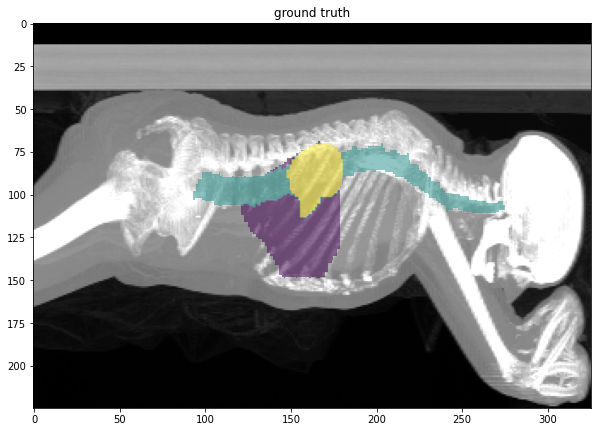

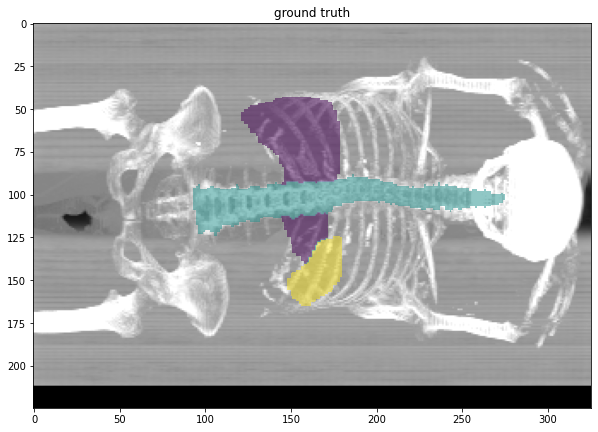

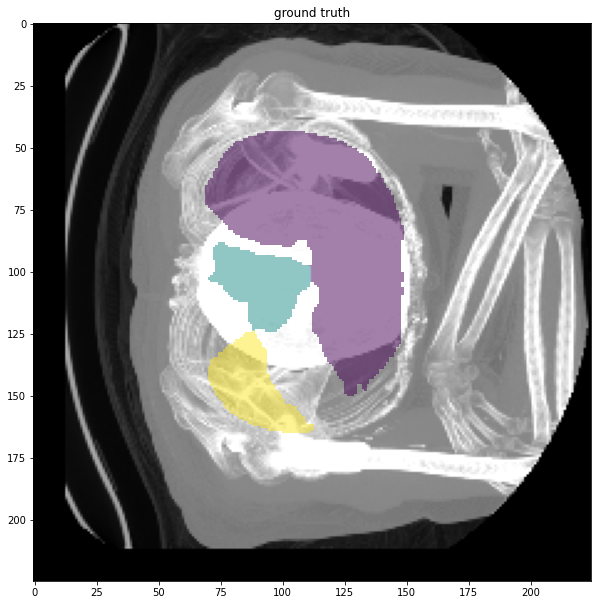

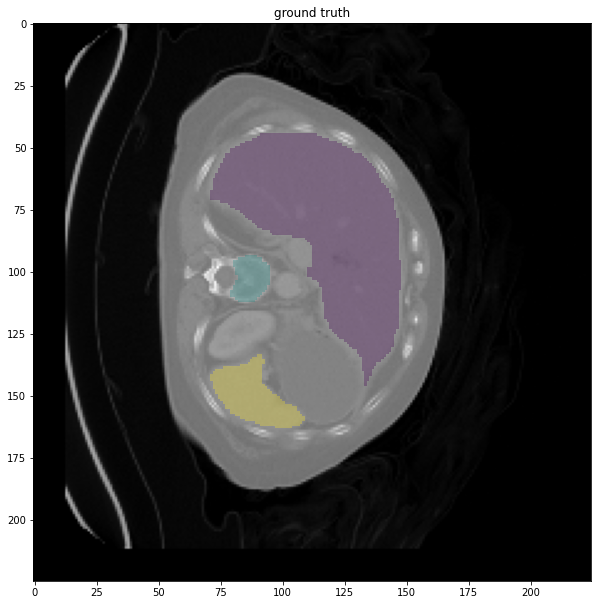

In [23]:
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
png_dir = Path('/mnt/qdata/raheppt1/data/tumorvolume/processed/ctorgans/validation/png/orientation')
from scipy.ndimage import find_objects
spleen_box = find_objects(mask==3)[0]
print(spleen_box)
with h5py.File(h5_path, 'r') as hf:
    target_keys = list(hf['images'])
    key = target_keys[0]
    img = hf[f'images/{key}'][0, :].astype(np.float32)
    mask = hf[f'labels/{key}'][0, :].astype(np.uint8)
    fig, ax = plt.subplots(figsize=[10,15])
    ax.title.set_text('ground truth')
    axis=0
    ax.imshow(img.max(axis=axis), cmap='gray')
    mip = mask.max(axis=axis)
    mip = np.ma.array(mip, mask=(mip==0))
    ax.imshow(mip, alpha=0.5)
    plt.show()
    fig, ax = plt.subplots(figsize=[10,15])
    ax.title.set_text('ground truth')
    axis=1
    ax.imshow(img.max(axis=axis), cmap='gray')
    mip = mask.max(axis=axis)
    mip = np.ma.array(mip, mask=(mip==0))
    ax.imshow(mip, alpha=0.5)
    plt.show()
    fig, ax = plt.subplots(figsize=[10,15])
    ax.title.set_text('ground truth')
    axis=2
    ax.imshow(img.max(axis=axis), cmap='gray')
    mip = mask.max(axis=axis)
    mip = np.ma.array(mip, mask=(mip==0))
    ax.imshow(mip, alpha=0.5)
    plt.show()
    fig, ax = plt.subplots(figsize=[10,15])
    ax.title.set_text('ground truth')
    mip = mask[:,:,(spleen_box[2].start +spleen_box[2].stop)//2]
    mip = np.ma.array(mip, mask=(mip==0))
    ax.imshow(img[:,:,(spleen_box[2].start +spleen_box[2].stop)//2], cmap='gray')
    ax.imshow(mip, alpha=0.3)
    plt.show()


In [49]:
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'r') as hf:
    target_keys = list(hf['images'])
    img = hf[f'images/054'][0,...].astype(np.float32)
    mask = hf[f'labels/054'][0,...].astype(np.uint8)

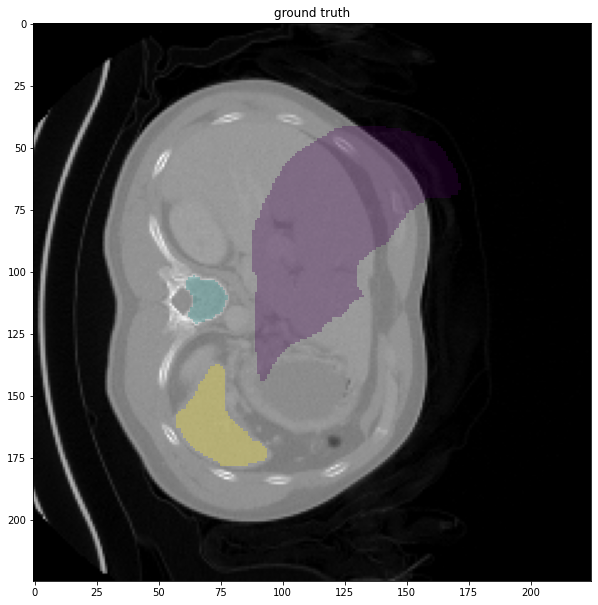

In [50]:
spleen_box = find_objects(mask==3)[0]
fig, ax = plt.subplots(figsize=[10,15])
ax.title.set_text('ground truth')
mip = mask[:,:,(spleen_box[2].start +spleen_box[2].stop)//2]
mip = np.ma.array(mip, mask=(mip==0))
ax.imshow(img[:,:,(spleen_box[2].start +spleen_box[2].stop)//2], cmap='gray')
ax.imshow(mip, alpha=0.3)
plt.show()

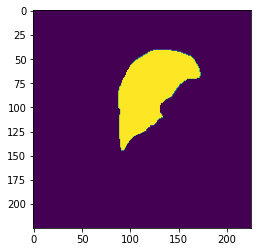

In [51]:
plt.imshow((mask==1)[:,:,(spleen_box[2].start +spleen_box[2].stop)//2])
plt.show()

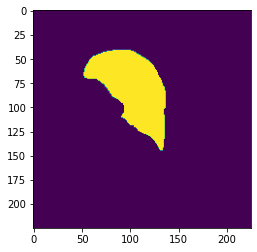

In [52]:
new_liver_mask = (mask==1)[:,::-1,:]
mask[mask==1] = 0
mask[new_liver_mask]=1
plt.imshow((new_liver_mask==1)[:,:,(spleen_box[2].start +spleen_box[2].stop)//2])
plt.show()

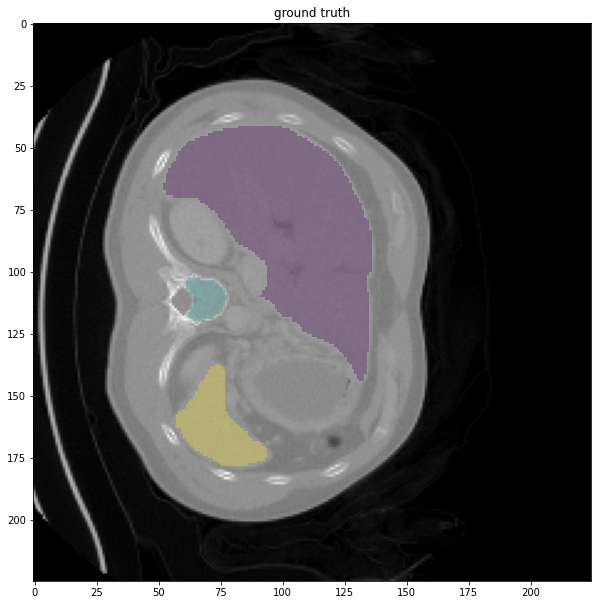

In [53]:
spleen_box = find_objects(mask==3)[0]
fig, ax = plt.subplots(figsize=[10,15])
ax.title.set_text('ground truth')
mip = mask[:,:,(spleen_box[2].start +spleen_box[2].stop)//2]
mip = np.ma.array(mip, mask=(mip==0))
ax.imshow(img[:,:,(spleen_box[2].start +spleen_box[2].stop)//2], cmap='gray')
ax.imshow(mip, alpha=0.3)
plt.show()

In [61]:
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'a') as hf:
    target_keys = list(hf['images'])
    hf[f'labels/054'][0,...] = mask.astype(np.uint8)

In [62]:
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'r') as hf:
    target_keys = list(hf['images'])
    img = hf[f'images/056'][0,...].astype(np.float32)
    mask = hf[f'labels/056'][0,...].astype(np.uint8)

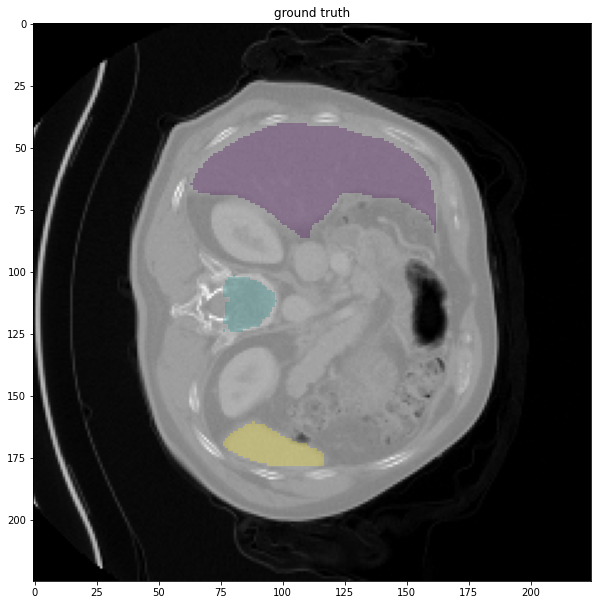

In [76]:
spleen_box = find_objects(mask==3)[0]
fig, ax = plt.subplots(figsize=[10,15])
ax.title.set_text('ground truth')
mip = mask[:,:,(spleen_box[2].start +spleen_box[2].stop)//2-10]
mip = np.ma.array(mip, mask=(mip==0))
ax.imshow(img[:,:,(spleen_box[2].start +spleen_box[2].stop)//2-10], cmap='gray')
ax.imshow(mip, alpha=0.3)
plt.show()

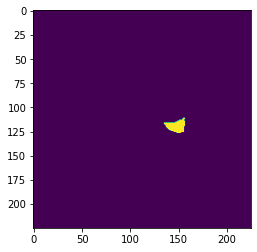

In [65]:
plt.imshow((mask==2)[:,:,(spleen_box[2].start +spleen_box[2].stop)//2])
plt.show()

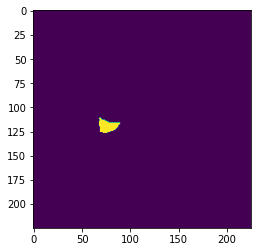

In [66]:
new_spine_mask = (mask==2)[:,::-1,:]
mask[mask==2] = 0
mask[new_spine_mask]=2
plt.imshow((new_spine_mask==1)[:,:,(spleen_box[2].start +spleen_box[2].stop)//2])
plt.show()

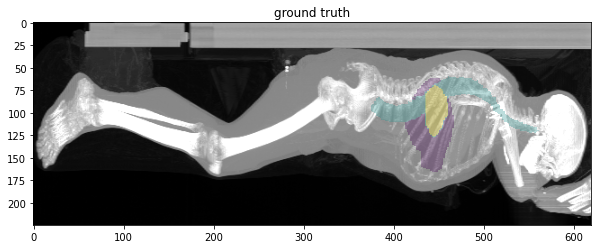

In [79]:
fig, ax = plt.subplots(figsize=[10,15])
ax.title.set_text('ground truth')
mip = mask.max(axis=0)
mip = np.ma.array(mip, mask=(mip==0))
ax.imshow(img.max(axis=0), cmap='gray')
ax.imshow(mip, alpha=0.3)
plt.show()

In [80]:
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'a') as hf:
    target_keys = list(hf['images'])
    hf[f'labels/056'][0,...] = mask.astype(np.uint8)

In [81]:
# 054 was still corrupted -> deleted
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'a') as hf:
    target_keys = list(hf['images'])
    del hf[f'labels/054']
    del hf[f'images/054']

In [82]:
h5_path = '/mnt/qdata/raheppt1/data/tumorvolume/interim/ctorgans/ctorgans.h5'
with h5py.File(h5_path, 'r') as hf:
    target_keys = list(hf['images'])
    print(target_keys)

['002', '003', '004', '005', '006', '007', '008', '009', '010', '013', '014', '015', '016', '017', '018', '019', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '051', '052', '053', '055', '056', '057', '058']
